In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from embetter.grab import ColumnGrabber
from embetter.text import SentenceEncoder

/home/bobcasta/.medical_doc_clf/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(
    '../data/raw/biomedical-text-publication-classification.zip', 
    encoding='latin1',
    names=['label', 'text'],
    usecols=[1, 2],
    header=1
)

In [3]:
df.head()

,label,text
0,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
1,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
2,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
3,Thyroid_Cancer,This study aimed to investigate serum matrix ...
4,Thyroid_Cancer,This study was performed to explore the effec...


In [4]:
len(df)

7569

<Axes: >

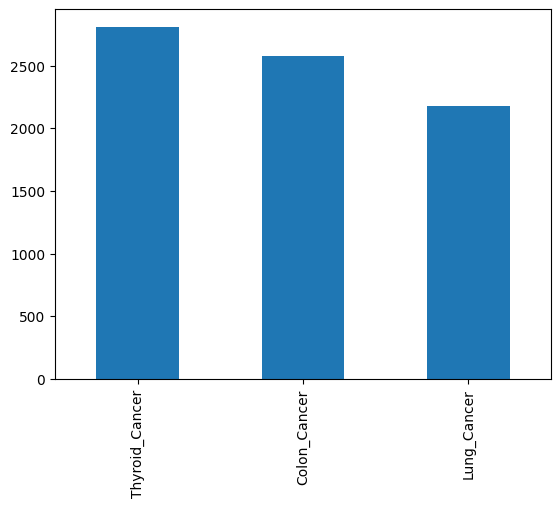

In [5]:
df['label'].value_counts().plot(kind='bar')

In [6]:
def clean_text(dataframe, text_column):
    dataframe[text_column] = dataframe[text_column].str.lower()
    dataframe[text_column] = dataframe[text_column].str.replace(r'[^\w\s]+', '')
    dataframe[text_column] = dataframe[text_column].str.replace(r'\d+', '')
    dataframe[text_column] = dataframe[text_column].astype(str)
    return dataframe

In [7]:
df = clean_text(df, 'text')

/tmp/ipykernel_4121/58827535.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[text_column] = dataframe[text_column].str.replace(r'[^\w\s]+', '')
/tmp/ipykernel_4121/58827535.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[text_column] = dataframe[text_column].str.replace(r'\d+', '')


In [8]:
X = pd.DataFrame(df['text'])
y = pd.DataFrame(df['label'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipeline = make_pipeline(
        ColumnGrabber("text"),
        SentenceEncoder('all-mpnet-base-v2'),
        LogisticRegression()
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)